<a href="https://colab.research.google.com/github/mlaricobar/WebScrapingCourse/blob/master/DMC2019I_NOT4_Web_Scraping_Sunat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción al package Selenium

Selenium Python bindings proporciona un API simple para escribir pruebas funcionales usando el WebDriver de Selenium. A través del API de Python de Selenium puedes utilizar todas las funcionalidades del WebDriver de Selenium de una forma intuitiva y sencilla. Por medio de este API podemos acceder a los WebDrivers de Selenium como Firefox, Internet Explorer, Google Chrome, Remote, etc. 

### Instalación de Selenium Python Bindings

In [0]:
# Librería Selenium
!pip install selenium

In [0]:
!pip install pytesseract

     |████████████████████████████████| 174kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/d5/90/56/ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


In [0]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,950 kB/s)
debconf: unable to initia

### Instalación del Web Driver de Selenium

Para automatizar las interacciones con el navegador necesitamos de un **Driver** que sirva como interfaz ante el navegador. Por ejemplo, `Firefox` requiere [geckodriver](https://github.com/mozilla/geckodriver/releases). En la siguiente tabla se listan los drivers necesarios para cada navegador:

| Navegador | Driver 
| --- | :---: 
| **Chrome:** |   https://sites.google.com/a/chromium.org/chromedriver/downloads  
| **Edge:** |   https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/  
| **Firefox:** |   https://github.com/mozilla/geckodriver/releases  
| **Safari:** |   https://webkit.org/blog/6900/webdriver-support-in-safari-10/

#### En windows

#### En Linux

In [0]:
# instalar el Driver de Chrome
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 67.9 MB of archives.
After this operation, 249 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 73.0.3683.86-0ubuntu0.18.04.1 [1,111 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 73.0.3683

In [0]:
# Encontrar el path donde se encuentra instalado el Driver de Chrome
!which chromedriver

/usr/bin/chromedriver


### Importar los módulos y configurar el driver de Selenium

In [0]:
driver_path = "/usr/bin/chromedriver"

In [0]:
# importar los módulos de la librería Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [0]:
options = Options()
options.add_argument("--headless") #
options.add_argument('--no-sandbox')
options.add_argument("--disable-extensions")
options.add_argument('start-maximized')
options.add_argument('disable-infobars')

In [0]:
# Instanciar el objeto Driver usando los path definidos
driver = webdriver.Chrome(options=options, executable_path=driver_path)

### Principales métodos y propiedades de Selenium

In [0]:
help(driver)

Help on WebDriver in module selenium.webdriver.chrome.webdriver object:

class WebDriver(selenium.webdriver.remote.webdriver.WebDriver)
 |  Controls the ChromeDriver and allows you to drive the browser.
 |  
 |  You will need to download the ChromeDriver executable from
 |  http://chromedriver.storage.googleapis.com/index.html
 |  
 |  Method resolution order:
 |      WebDriver
 |      selenium.webdriver.remote.webdriver.WebDriver
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, executable_path='chromedriver', port=0, options=None, service_args=None, desired_capabilities=None, service_log_path=None, chrome_options=None, keep_alive=True)
 |      Creates a new instance of the chrome driver.
 |      
 |      Starts the service and then creates new instance of chrome driver.
 |      
 |      :Args:
 |       - executable_path - path to the executable. If the default is used it assumes the executable is in the $PATH
 |       - port - port you would like the serv

In [0]:
# Definir Url de la página que vamos a Scrapear
url = "https://e-consultaruc.sunat.gob.pe/cl-ti-itmrconsruc/frameCriterioBusqueda.jsp"

- **get(url)**: Carga una página web en la sesión actual del navegador a partir de la url brindada.

In [0]:
driver.get(url)

- **page_source**: Propiedad que nos permite obtener el código fuente de la página actual.

In [0]:
print(driver.page_source)

<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Consulta RUC</title>
<link href="/a/css/estilos2_0.css" rel="stylesheet" /><script languaje="JavaScript" src="/a/js/js.js"> </script><script languaje="JavaScript" type="text/javascript">
var gCount = 0;
var contPag = 0;
function goRefresh() {
 document.mainForm.codigo.value = "";
 document.mainForm.imagen.src="captcha?accion=image&amp;nmagic=" + gCount;
 gCount = gCount + 1;
}


function format(type) {
 var form = document.mainForm;
 if(type == 0) {
   document.getElementById('s1').style.visibility = 'visible'; 
   document.getElementById('s2').style.visibility = 'hidden';
   document.getElementById('s3').style.visibility = 'hidden';
   form.search1.maxLength = 11;
   form.search1.onkeypress = function(e) {
   if (!e) e=window.event;
   key = e.keyCode? e.keyCode : e.which&gt;0?e.which:e.keyCode;
   if (key == 8 || key==9) return true;
   pattern =/[0-9]/;
   te = String.fromCharCode(key);
   return pattern.test(te);     
  }  
 

- **find_element_by_class_name(name)**: Método que encuentra un elemento por medio del nombre de la clase de CSS que tiene asociado.

**Elemento Texto de RUC**

In [0]:
# Por ejemplo, el TextField ruc tiene la clase asociada "form-text"
ruc_text = driver.find_element_by_class_name("form-text")

In [0]:
# ¿Qué valor tiene esta variable?
ruc_text

<selenium.webdriver.remote.webelement.WebElement (session="022d820e71d34ecc5d2a043ed4f9fc4e", element="0.7934771195448767-1")>

In [0]:
# Tipo de variable
type(ruc_text)

selenium.webdriver.remote.webelement.WebElement

In [0]:
ruc_text.get_property("value")

''

- **send_keys(value)**: Método que simula el tipear un elemento con un valor.

In [0]:
ruc_text.send_keys("20520972740")

In [0]:
ruc_text.get_property("value")

'20520972740'

In [0]:
ruc_text.clear()

**Elemento Buscar**

In [0]:
# Por ejemplo, el botón buscar tiene la clase asociada "form-button"
button = driver.find_element_by_class_name("form-button")

In [0]:
# ¿Qué valor tiene esta variable?
button

<selenium.webdriver.remote.webelement.WebElement (session="022d820e71d34ecc5d2a043ed4f9fc4e", element="0.7934771195448767-2")>

In [0]:
# Tipo de variable
type(button)

selenium.webdriver.remote.webelement.WebElement

In [0]:
# Verificar si el botón se muestra en la página o está oculto
button.is_displayed()

True

In [0]:
# Obtener algun valor del CSS asociado
button.value_of_css_property("border-color")

'rgb(102, 153, 204)'

In [0]:
# Obtener algun atributo del elemento. Por ejemplo el tipo de elemento
button.get_attribute("type")

'button'

In [0]:
# Obtener algun atributo del elemento. Por ejemplo el atributo onclick, que ejecuta un código JavaScript cuando damos click al elemento
button.get_attribute("onClick")

'evalSearch();'

**Elemento Imagen Captcha**

In [0]:
# Por ejemplo, el elemento donde se encuentra la imagen del captcha tiene el siguiente código xpath
captcha = driver.find_element_by_xpath("//img[@src='captcha?accion=image']")

In [0]:
captcha.screenshot(filename="sh01.png")

True

In [0]:
!ls -l

total 12
drwxr-xr-x 1 root root 4096 May 15 16:23 sample_data
-rw-r--r-- 1 root root 7499 May 16 21:18 sh01.png


In [0]:
from IPython.display import Image as ImageDisplay

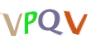

In [0]:
Image(filename='sh01.png')

In [0]:
type(captcha.screenshot_as_png)

bytes

In [0]:
type(captcha.screenshot_as_base64)

str

In [0]:
import pytesseract

from PIL import Image

In [0]:
img = Image.open("sh01.png")

In [0]:
captcha_value_ocr = pytesseract.image_to_string(img)
captcha_value_ocr

'VPQV'

**Elemento Texto Captcha**

In [0]:
captcha_input = driver.find_element_by_xpath('//input[@name="codigo"]')

In [0]:
captcha_input.send_keys(captcha_value_ocr)

In [0]:
captcha_input.get_property("value")

'VPQV'

In [0]:
button.click()

In [0]:
print(driver.page_source)

<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Consulta RUC</title>
<link href="/a/css/estilos2_0.css" rel="stylesheet" /><script languaje="JavaScript" src="/a/js/js.js"> </script><script languaje="JavaScript" type="text/javascript">
var gCount = 0;
var contPag = 0;
function goRefresh() {
 document.mainForm.codigo.value = "";
 document.mainForm.imagen.src="captcha?accion=image&amp;nmagic=" + gCount;
 gCount = gCount + 1;
}


function format(type) {
 var form = document.mainForm;
 if(type == 0) {
   document.getElementById('s1').style.visibility = 'visible'; 
   document.getElementById('s2').style.visibility = 'hidden';
   document.getElementById('s3').style.visibility = 'hidden';
   form.search1.maxLength = 11;
   form.search1.onkeypress = function(e) {
   if (!e) e=window.event;
   key = e.keyCode? e.keyCode : e.which&gt;0?e.which:e.keyCode;
   if (key == 8 || key==9) return true;
   pattern =/[0-9]/;
   te = String.fromCharCode(key);
   return pattern.test(te);     
  }  
 

In [0]:
driver.switch_to.window("CDwindow-7727487FAD533B540A2F916B91199FCF")

In [0]:
driver.title

'Consulta RUC'

In [0]:
driver.refresh()

In [0]:
driver.close()

In [0]:
driver.window_handles

['CDwindow-7727487FAD533B540A2F916B91199FCF',
 'CDwindow-82797EA09CD1FF3E1001FF991BA8F0B4']

In [0]:
driver.switch_to.window('CDwindow-82797EA09CD1FF3E1001FF991BA8F0B4')

In [0]:
driver.title

'Consulta RUC'

In [0]:
#print(driver.page_source)

In [0]:
# importar la librería BeautifulSoup
from bs4 import BeautifulSoup

import re

In [0]:
soup = BeautifulSoup(markup=driver.page_source, features='html.parser')

In [0]:
table = soup.find(name="table", attrs={"class": "form-table"}).find("tbody")

In [0]:
table.find_next()

<tr>
<td class="bgn" colspan="1" width="18%">Número de RUC: </td>
<td class="bg" colspan="3">20520972740 - J &amp; J DATA MINING CONSULTING SOCIEDAD ANONIMA CERRADA</td>
</tr>

In [0]:
table.find_next().find_next_sibling()

<tr>
<td class="bgn" colspan="1">Tipo Contribuyente: </td>
<td class="bg" colspan="3">SOCIEDAD ANONIMA CERRADA</td>
</tr>

In [0]:
table.find_next().find_next_sibling().find_next_sibling()

<tr>
<td class="bgn" colspan="1">Nombre Comercial: </td>
<td class="bg" colspan="1">-</td>
</tr>

In [0]:
pattern_dict = {
    'ruc': 'n[ú|u]mero\s+de\s+ruc:\s+',
    'tipo_contribuyente': 'tipo\s+contribuyente:\s+',
    'estado_contribuyente': 'estado\s+del\s+contribuyente:\s+',
    'condicion_contribuyente': 'condici[ó|o]n\s+del\s+contribuyente:',
    'nombre_comercial': 'nombre\s+comercial:\s+',
    'actividad_comercio_exterior': 'actividad\s+de\s+comercio\s+exterior:'
}

In [0]:
for var, pattern in pattern_dict.items():
  print(var, ": ", soup.find(name='td', attrs={'class':'bgn'}, text=re.compile(pattern, re.IGNORECASE)).find_next_sibling().get_text().strip())

ruc :  20520972740 - J & J DATA MINING CONSULTING SOCIEDAD ANONIMA CERRADA
tipo_contribuyente :  SOCIEDAD ANONIMA CERRADA
estado_contribuyente :  ACTIVO
condicion_contribuyente :  HABIDO
nombre_comercial :  -
actividad_comercio_exterior :  SIN ACTIVIDAD


In [0]:
import json

Integrar todo lo visto en funciones

In [0]:
def get_data(driver):
  soup = BeautifulSoup(markup=driver.page_source, features='html.parser')
  var_dict = {var: soup.find(name='td', attrs={'class':'bgn'}, text=re.compile(pattern, re.IGNORECASE)).find_next_sibling().get_text().strip() for var, pattern in pattern_dict.items()}
  return var_dict

In [0]:
def submit_request(driver, ruc):
    driver.refresh()
    ruc_input = driver.find_element_by_class_name("form-text")
    captcha_input = driver.find_element_by_xpath('//input[@name="codigo"]')
    captcha = driver.find_element_by_xpath("//img[@src='captcha?accion=image']")
    button = driver.find_element_by_class_name("form-button")

    captcha.screenshot(filename="{0}.png".format("captcha_img_tmp"))
    img_tmp = Image.open("{0}.png".format("captcha_img_tmp"))
    captcha_value_ocr = pytesseract.image_to_string(img_tmp)
    
    
    #ImageDisplay(filename="{0}.png".format("captcha_img_tmp"))
    #print(captcha_value_ocr)
    
    
    ruc_input.send_keys(ruc)
    captcha_input.send_keys(captcha_value_ocr)
    button.click()
    
    tab_list = driver.window_handles
    driver.switch_to.window(tab_list[-1])
    try:
      if "error" in driver.title.strip().lower() or 'mensajes' in driver.title.strip().lower():  
        driver.close()
        driver.switch_to.window(tab_list[0])
        driver.refresh()

        return False, {}, driver

      else:
        data = get_data(driver)
        driver.close()
        driver.switch_to.window(tab_list[0])
        driver.refresh()

        return True, data, driver
    except UnexpectedAlertPresentException:
      alert = driver.switch_to.alert
      alert.accept()
      return False, {}, driver
      

In [0]:
def consulta_ruc(ruc, driver):
  print("CONSULTA RUC: {0}".format(ruc))
  n_attempt, success, data = 1, False, {}
  while (n_attempt < 4) & (success == False):
    print("\tAttempt nrº {0}".format(n_attempt))
    success, data, driver = submit_request(driver, ruc)
    n_attempt+=1
  return data

In [0]:
driver.get(url)

In [0]:
alert = driver.switch_to.alert

In [0]:
alert.accept()

In [0]:
data = consulta_ruc("20557123106", driver)
print(json.dumps(data, indent=4))

CONSULTA RUC: 20557123106
	Attempt nrº 1
{
    "ruc": "20557123106 - FUNDACION CORPORACION RUSTICA",
    "tipo_contribuyente": "FUNDACION",
    "estado_contribuyente": "ACTIVO",
    "condicion_contribuyente": "HABIDO",
    "nombre_comercial": "-",
    "actividad_comercio_exterior": "SIN ACTIVIDAD"
}


In [0]:
ruc_list = ["20538856674", "20551597939", "20553856451", "20525426778", "20555629541", "20480316259", "20601587417", "20600060172", "20518639928", "20558629585", "20548971111", "20543248984", "20523447948", "20600705114", "20553476462", "20556610143", "20553741123", "20552271794", "20551936903", "20563223457"]

In [0]:
data_list = []
for ruc in ruc_list:
  data_list.append(consulta_ruc(ruc, driver))

CONSULTA RUC: 20538856674
	Attempt nrº 1
CONSULTA RUC: 20551597939
	Attempt nrº 1
CONSULTA RUC: 20553856451
	Attempt nrº 1
CONSULTA RUC: 20525426778
	Attempt nrº 1
CONSULTA RUC: 20555629541
	Attempt nrº 1
	Attempt nrº 2
CONSULTA RUC: 20480316259
	Attempt nrº 1
CONSULTA RUC: 20601587417
	Attempt nrº 1
CONSULTA RUC: 20600060172
	Attempt nrº 1
CONSULTA RUC: 20518639928
	Attempt nrº 1
CONSULTA RUC: 20558629585
	Attempt nrº 1
CONSULTA RUC: 20548971111
	Attempt nrº 1
CONSULTA RUC: 20543248984
	Attempt nrº 1
CONSULTA RUC: 20523447948
	Attempt nrº 1
	Attempt nrº 2
CONSULTA RUC: 20600705114
	Attempt nrº 1
CONSULTA RUC: 20553476462
	Attempt nrº 1
CONSULTA RUC: 20556610143
	Attempt nrº 1
CONSULTA RUC: 20553741123
	Attempt nrº 1
CONSULTA RUC: 20552271794
	Attempt nrº 1
CONSULTA RUC: 20551936903
	Attempt nrº 1
CONSULTA RUC: 20563223457
	Attempt nrº 1


In [0]:
import pandas as pd

In [0]:
pd.DataFrame(data_list)

,actividad_comercio_exterior,condicion_contribuyente,estado_contribuyente,nombre_comercial,ruc,tipo_contribuyente
0,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20538856674 - ARTROSCOPICTRAUMA S.A.C.,SOCIEDAD ANONIMA CERRADA
1,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20551597939 - ASOCIACION COMUNIDAD CRISTIANA E...,ASOCIACION
2,IMPORTADOR/EXPORTADOR,HABIDO,ACTIVO,-,20553856451 - BI GRAND CONFECCIONES S.A.C.,SOCIEDAD ANONIMA CERRADA
3,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20525426778 - CONCEPTOS & CONSTRUCCIONES V.G EIRL,EMPRESA INDIVIDUAL DE RESP. LTDA
4,IMPORTADOR/EXPORTADOR,HABIDO,ACTIVO,CORPORACION INDUSTRIAL ALPA´C,20555629541 - CORPORACION INDUSTRIAL ALPA`C S....,SOCIEDAD ANONIMA CERRADA
5,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20480316259 - D'AROMAS E.I.R.L.,EMPRESA INDIVIDUAL DE RESP. LTDA
6,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20601587417 - ESTUDIO CONTABLE BUSTAMANTE & VI...,SOCIEDAD ANONIMA CERRADA
7,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20600060172 - GARDINALLI SALUD & BIENESTAR S.A.C.,SOCIEDAD ANONIMA CERRADA
8,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20518639928 - H & J E HIJOS E.I.R.L,EMPRESA INDIVIDUAL DE RESP. LTDA
9,SIN ACTIVIDAD,HABIDO,ACTIVO,-,20558629585 - INSUMOS PISQUEROS DEL SUR E.I.R.L.,EMPRESA INDIVIDUAL DE RESP. LTDA
